In [1]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.1], [6.3], [4.8], 
                    [9.7], [6.2], [7.9], [2.7], [7.2], 
                    [10.1], [5.3], [7.7], [3.1]])

y_train = np.array([[1.7], [1.9], [2.09], [2.1], [1.9], [1.3], 
                    [3.3], [2.5], [2.5], [1.1], [2.7], 
                    [3.4], [1.5], [2.4], [1.3]])

# 텐서화
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

print(f"x_train_tensor=\n{x_train_tensor}\n")
print(f"y_train_tensor=\n{y_train_tensor}")

x_train_tensor=
tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.1000],
        [ 6.3000],
        [ 4.8000],
        [ 9.7000],
        [ 6.2000],
        [ 7.9000],
        [ 2.7000],
        [ 7.2000],
        [10.1000],
        [ 5.3000],
        [ 7.7000],
        [ 3.1000]])

y_train_tensor=
tensor([[1.7000],
        [1.9000],
        [2.0900],
        [2.1000],
        [1.9000],
        [1.3000],
        [3.3000],
        [2.5000],
        [2.5000],
        [1.1000],
        [2.7000],
        [3.4000],
        [1.5000],
        [2.4000],
        [1.3000]])


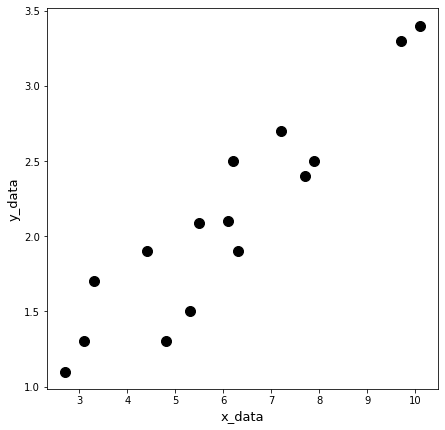

In [3]:
# scatter plot

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x_train_tensor, y_train_tensor, 
          s=100, color='black')
ax.set_xlabel('x_data', fontsize=13)
ax.set_ylabel('y_data', fontsize=13)

plt.show()

## Hyper Parameter
$$ Wnew = Wold - \alpha \nabla W $$

In [4]:
# Hyper Parameter
input_size = x_train_tensor.size()[-1]
output_size = y_train_tensor.size()[-1]
num_epochs = 50
learning_rate = 0.01

## Model
$$ H(x) = Wx + b $$

In [5]:
# Linear regression model
model = torch.nn.Linear(in_features=input_size, out_features=output_size)

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [6]:
# 손실함수, Optimizer 정의
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

## Training

In [7]:
for epoch in range(num_epochs):
    # 모델링
    optimizer.zero_grad() # 한번 학습을 하고난 후 gradient를 zero로 만들어줌(gradient값은 누적해서 계속해서 더해지기 때문에 초기화를 해줘야함)
    
    outputs = model(x_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    # 학습
    loss.backward() # gradient 값을 계산(backpropagation 이용)
    optimizer.step() # weight값을 업데이트
    
    # Loss 확인
    if (epoch+1) % 2 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.2f}")

Epoch [2], Loss: 0.33
Epoch [4], Loss: 0.06
Epoch [6], Loss: 0.06
Epoch [8], Loss: 0.06
Epoch [10], Loss: 0.06
Epoch [12], Loss: 0.06
Epoch [14], Loss: 0.06
Epoch [16], Loss: 0.06
Epoch [18], Loss: 0.06
Epoch [20], Loss: 0.06
Epoch [22], Loss: 0.06
Epoch [24], Loss: 0.06
Epoch [26], Loss: 0.06
Epoch [28], Loss: 0.06
Epoch [30], Loss: 0.06
Epoch [32], Loss: 0.06
Epoch [34], Loss: 0.06
Epoch [36], Loss: 0.06
Epoch [38], Loss: 0.06
Epoch [40], Loss: 0.06
Epoch [42], Loss: 0.06
Epoch [44], Loss: 0.06
Epoch [46], Loss: 0.06
Epoch [48], Loss: 0.06
Epoch [50], Loss: 0.06


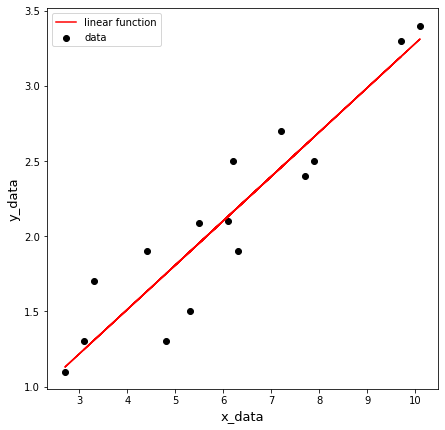

In [8]:
predicted = model(x_train_tensor).detach().numpy()

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_train, y_train, 
          c='black',
          label='data')
ax.plot(x_train, predicted,
        color='red',
       label='linear function')
ax.legend()

ax.set_xlabel('x_data', fontsize=13)
ax.set_ylabel('y_data', fontsize=13)

plt.show()

## 학습된 parameter 확인

In [9]:
# parameter 확인
model.state_dict()

OrderedDict([('weight', tensor([[0.2948]])), ('bias', tensor([0.3335]))])

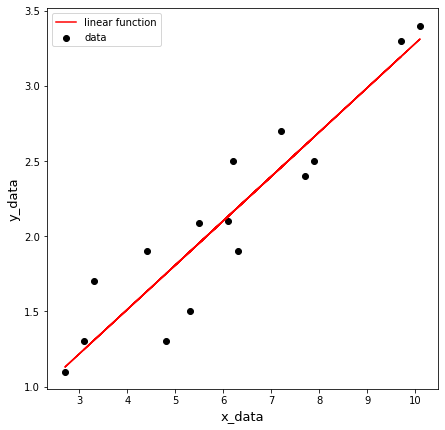

In [10]:
check_y = model.state_dict()['weight'].item()*x_train + model.state_dict()['bias'].item()

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_train, y_train, 
          c='black',
          label='data')
ax.plot(x_train, check_y,
        color='red',
       label='linear function')
ax.legend()

ax.set_xlabel('x_data', fontsize=13)
ax.set_ylabel('y_data', fontsize=13)

plt.show()